In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/weight-height.csv')

In [3]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

<Axes: xlabel='Height', ylabel='Density'>

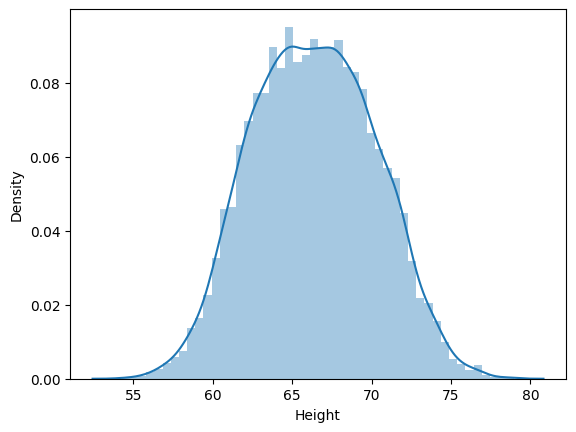

In [5]:
sns.distplot(df['Height'])

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: ylabel='Height'>

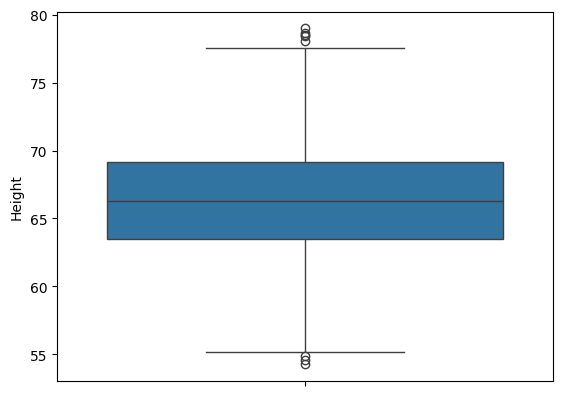

In [7]:
sns.boxplot(df['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

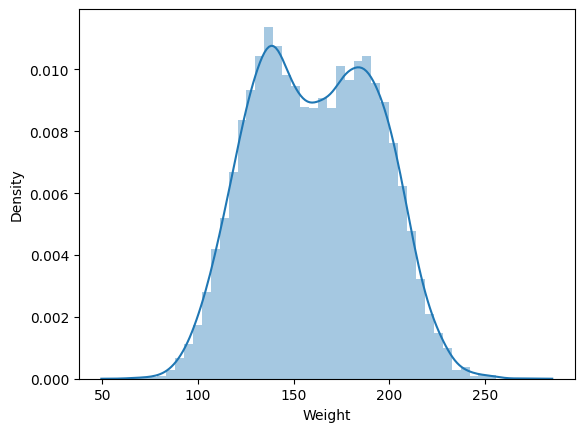

In [8]:
sns.distplot(df['Weight'])

we assume some percentile e.g 99 and 1
below 1 outlier
above 99 outlier

In [9]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)

In [10]:
new_df=df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]

In [11]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [13]:
upper_limit,lower_limit

(np.float64(227.43736983602577), np.float64(97.03287365980914))

<Axes: ylabel='Height'>

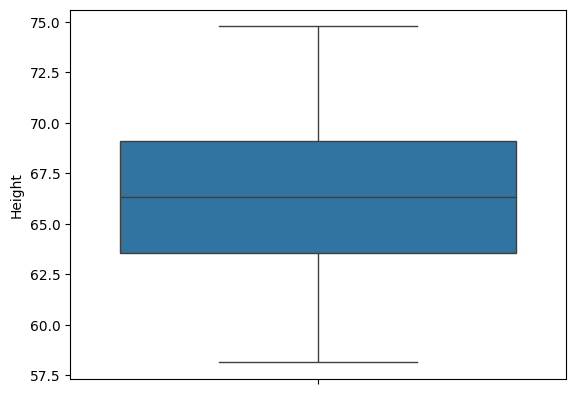

In [14]:
sns.boxplot(new_df['Height'])

<Axes: xlabel='Height', ylabel='Density'>

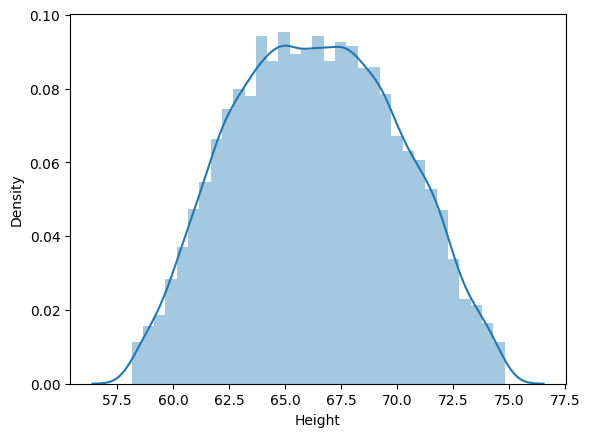

In [15]:
sns.distplot(new_df['Height'])

In [16]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [17]:
df['Height'].describe()

count    1.000000e+04
mean     9.703287e+01
std      2.025148e-11
min      9.703287e+01
25%      9.703287e+01
50%      9.703287e+01
75%      9.703287e+01
max      9.703287e+01
Name: Height, dtype: float64